# Projections

As the package allows to use most of the MoleculeKit projections (as long as the obtained matrix has more than one rows of features), we report here the ID values computed on different metrics, tested both on [villin](#villin) and [NTL9](#ntl9).

To highlight the structural features of the two proteins we selected the atomic distances (Cα, Cβ) and torsion angles (φ/ψ, χ) as test projections.

In [1]:
%run maintainer/sett.py #import packages and plot setup
Path("../extra").mkdir(exist_ok=True)

Settings loaded.


## Villin

In [2]:
topology='examples/villin/2f4k.pdb'
trajectory='examples/villin/2f4k'
protein = 'villin'

data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 

for state in states:
    mol = Molecule(topology)
    mol.read(trajectory+f'_{state}.xtc')
    mol.set('resname', 'LEU', 'resname NLE')
    mol.set('resname', 'HIS', 'resname HIP')
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cα Dist.',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'step': 3}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cα Dist. 3',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'sele' : 'name CB'}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cβ Dist.',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'sele' : 'name CB','step': 3}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cβ Dist. 3',
            'mean_all': mean_all,
            'mean_last': mean_last,})     
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "φ/ψ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'sincos':True},id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "Sin/Cos φ/ψ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'dihedrals': ('chi1', 'chi3', 'chi4', 'chi5')}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "χ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'dihedrals': ('chi1', 'chi3', 'chi4', 'chi5'),'sincos':True},id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "Sin/Cos χ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")

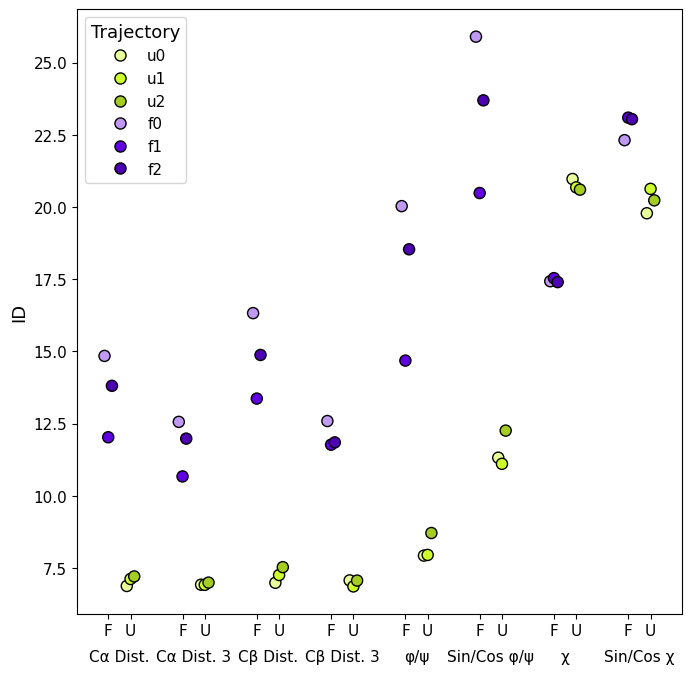

In [3]:
states = data["trajectory"].unique()
fig, ax = plt.subplots(figsize=(7,7))

projections = data['projection'].unique()
width = 0.3  

for i, proj in enumerate(projections):
    # Get all data for this projection first
    proj_data = data[data['projection'] == proj]
    total_points = len(proj_data)

    color_indices = np.arange(total_points) % colors.N
    proj_colors = [colors(ci) for ci in color_indices]

    folded_mask = proj_data['folded'].values
    proj_data = proj_data.copy()
    proj_data['color'] = proj_colors

    for folded, group in proj_data.groupby('folded'):
        y_vals = group['mean_all'].values
        group_colors = group['color'].values
        x_center = i
        x_shift = -width/2 if folded else width/2
        n_points = len(y_vals)
        jitter = np.linspace(-0.05, 0.05, n_points)
        x_vals = np.full_like(y_vals, x_center + x_shift) + jitter

        ax.scatter(x_vals, y_vals,color=group_colors,edgecolor='black', marker='o', s=64,label=f"{proj} - {'Folded' if folded else 'Unfolded'}")

x_ticks = []
x_tick_labels = []
for i in range(len(projections)):
    x_ticks += [i - width/2, i + width/2]
    x_tick_labels += ['F', 'U']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
ax.set_box_aspect(1)

sec = ax.secondary_xaxis(location=-0.05)
sec.tick_params('x', length=0)
sec.spines['bottom'].set_linewidth(0)
sec.set_xticks(range(len(projections)))
sec.set_xticklabels(projections)

color_map = {s: colors(i % colors.N) for i, s in enumerate(states)}
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=color_map[s], markeredgecolor='black',
        markersize=8, label=s
    )
    for s in states
]
ax.legend(handles=handles, title="Trajectory", loc='best')
ax.set_ylabel("ID")
plt.tight_layout()
plt.savefig('../extra/villin_projections.pdf', dpi=300)
plt.show()


## NTL9

In [4]:
topology='examples/NTL9/ntl9.pdb'
trajectory='examples/NTL9/ntl9'
protein = 'NTL9'


data = []
states = ['u0','u1', 'u2', 'f0', 'f1', 'f2'] 

for state in states:
    mol = Molecule(topology)
    mol.read(trajectory+f'_{state}.xtc')
    mol.set('resname', 'LEU', 'resname NLE')
    mol.set('resname', 'HIS', 'resname HIP')
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cα Dist.',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'step': 3}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cα Dist. 3',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'sele' : 'name CB'}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cβ Dist.',
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last= intrinsic_dimension(mol=mol, projection_method='Distances', projection_kwargs={'sele' : 'name CB','step': 3}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': 'Cβ Dist. 3',
            'mean_all': mean_all,
            'mean_last': mean_last,})     
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "φ/ψ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'sincos':True},id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "Sin/Cos φ/ψ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'dihedrals': ('chi1', 'chi3', 'chi4', 'chi5')}, id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "χ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    mean_all, mean_last = intrinsic_dimension(mol=mol, projection_method='Dihedrals', projection_kwargs = {'dihedrals': ('chi1', 'chi3', 'chi4', 'chi5'),'sincos':True},id_method='global', verbose=False)
    data.append({
            'trajectory': state,
            'projection': "Sin/Cos χ",
            'mean_all': mean_all,
            'mean_last': mean_last,}) 
    
data = pd.DataFrame(data)
data["folded"] = data["trajectory"].str.startswith("f")

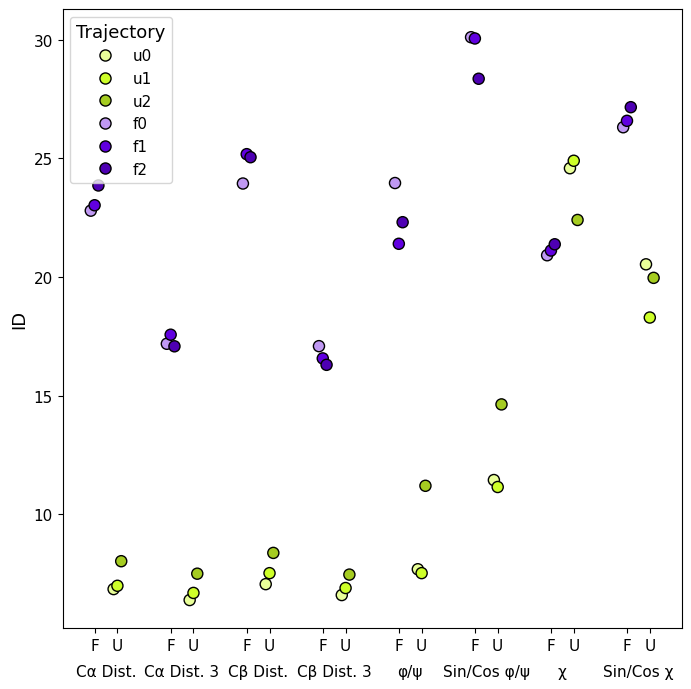

In [5]:
states = data["trajectory"].unique()
fig, ax = plt.subplots(figsize=(7,7))

projections = data['projection'].unique()
width = 0.3  

for i, proj in enumerate(projections):
    # Get all data for this projection first
    proj_data = data[data['projection'] == proj]
    total_points = len(proj_data)

    color_indices = np.arange(total_points) % colors.N
    proj_colors = [colors(ci) for ci in color_indices]

    folded_mask = proj_data['folded'].values
    proj_data = proj_data.copy()
    proj_data['color'] = proj_colors

    for folded, group in proj_data.groupby('folded'):
        y_vals = group['mean_all'].values
        group_colors = group['color'].values
        x_center = i
        x_shift = -width/2 if folded else width/2
        n_points = len(y_vals)
        jitter = np.linspace(-0.05, 0.05, n_points)
        x_vals = np.full_like(y_vals, x_center + x_shift) + jitter

        ax.scatter(x_vals, y_vals,color=group_colors,edgecolor='black', marker='o', s=64,label=f"{proj} - {'Folded' if folded else 'Unfolded'}")

x_ticks = []
x_tick_labels = []
for i in range(len(projections)):
    x_ticks += [i - width/2, i + width/2]
    x_tick_labels += ['F', 'U']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
ax.set_box_aspect(1)

sec = ax.secondary_xaxis(location=-0.05)
sec.tick_params('x', length=0)
sec.spines['bottom'].set_linewidth(0)
sec.set_xticks(range(len(projections)))
sec.set_xticklabels(projections)

color_map = {s: colors(i % colors.N) for i, s in enumerate(states)}
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=color_map[s], markeredgecolor='black',
        markersize=8, label=s
    )
    for s in states
]
ax.legend(handles=handles, title="Trajectory", loc='best')
ax.set_ylabel("ID")
plt.tight_layout()
plt.savefig('../extra/NTL9_projections.pdf', dpi = 300)
plt.show()